##### !pip install postgres

## Moodle Class
The class handles connection to the database and making retrivals. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sqlalchemy import create_engine

# The class handles connection to the database and making retrivals.
class Moodle():
    def __init__(self):
        self.cnx = None
    def connect_db(self,address,port,username,password, name):
        POSTGRES_ADDRESS = address 
        POSTGRES_PORT = port
        POSTGRES_USERNAME = username 
        POSTGRES_PASSWORD = password
        POSTGRES_DBNAME = name
        
        # A long string that contains the necessary Postgres login information
        postgres_str = ('postgresql://{username}:{password}@{ipaddress}:{port}/{dbname}'.format(username=POSTGRES_USERNAME,password=POSTGRES_PASSWORD,ipaddress=POSTGRES_ADDRESS,port=POSTGRES_PORT,dbname=POSTGRES_DBNAME))         # Create the connection
        self.cnx = create_engine(postgres_str)
        
    def get_num_records_of_table(self, table):
        return pd.read_sql_query('''SELECT COUNT(*) FROM '''+table+''' ;''', self.cnx)
        
    def get_num_tables(self):
        return pd.read_sql_query('''select count(*) from information_schema.tables where table_schema = 'public';''', self.cnx)
    
    def get_num_quiz_submissions_by_hour(self):
        return pd.read_sql_query('''select count(id), EXTRACT(HOUR FROM to_timestamp(timecreated)) AS HOUR from mdl_logstore_standard_log where action='submitted' AND component='mod_quiz' group by EXTRACT(HOUR FROM to_timestamp(timecreated));''', self.cnx)
    def get_num_events_by_user(self):
        return pd.read_sql_query('''select userid, sum(case when action = 'viewed' then 1 else 0 end) as viewed,sum(case when action = 'uploaded' then 1 else 0 end) as uploaded ,sum(case when action = 'updated' then 1 else 0 end) as updated,sum(case when action = 'answered' then 1 else 0 end) as answered ,sum(case when action = 'abandoned' then 1 else 0 end) as abandoned, sum(case when action = 'submitted' then 1 else 0 end) as Submitted, sum(case when action = 'searched' then 1 else 0 end) as searched, sum(case when action = 'attempted' then 1 else 0 end) as attempted from mdl_logstore_standard_log group by userid;''', self.cnx)

    def get_overall_grades(self):
        return pd.read_sql_query('''SELECT userid, sum(finalgrade) FROM mdl_grade_grades GROUP BY userid ORDER BY userid;''', self.cnx)
    def get_num_forum_posts(self):
        return pd.read_sql_query('''SELECT COUNT(*) FROM mdl_forum_posts ;''', self.cnx)
    #get dedication time of users
    def get_dedication_time_per_user(self):
        distinct_logins = pd.read_sql_query('''select distinct userid ,  timecreated from mdl_logstore_standard_log where action='loggedin' ;''' , self.cnx)
        all_actions = pd.read_sql_query('''select distinct userid ,  timecreated from mdl_logstore_standard_log where action not like'loggedin';''' , self.cnx)
        pass
    #get login counts
    def get_login_counts(self):
        return pd.read_sql_query('''SELECT userid, sum(case when action = 'loggedin' then 1 else 0 end) as logged_in from mdl_logstore_standard_log group by userid;''' , self.cnx)
    
        
    

## Instansiate Moodle object

In [3]:
moodle = Moodle()

## Make Connection

In [4]:
POSTGRES_ADDRESS = 'localhost'
POSTGRES_PORT = '5432'
POSTGRES_USERNAME = 'postgres'
POSTGRES_PASSWORD = 'password' 
POSTGRES_DBNAME = 'moodle' 
moodle.connect_db(POSTGRES_ADDRESS, POSTGRES_PORT, POSTGRES_USERNAME, POSTGRES_PASSWORD, POSTGRES_DBNAME )

### Get number of tables in database

In [19]:
moodle.get_num_tables().values[0][0]

448

### Get number of records in Most Important Tables (MIT)

#### Number of records in  `mdl_logstore_standard_log`

In [20]:
moodle.get_num_records_of_table('mdl_logstore_standard_log').values[0][0]

417554

#### Number of records in ` mdl_grade_grades`

In [21]:
moodle.get_num_records_of_table('mdl_grade_grades').values[0][0]

3643

#### Number of records in ` mdl_context`

In [22]:
moodle.get_num_records_of_table('mdl_context').values[0][0]

4359

#### Number of records in  `mdl_user`

In [23]:
moodle.get_num_records_of_table('mdl_user').values[0][0]

1052

#### Number of records in  `mdl_course`

In [24]:
moodle.get_num_records_of_table('mdl_course').values[0][0]

15

#### Number of records in `mdl_course_modules`

In [25]:
moodle.get_num_records_of_table('mdl_course_modules').values[0][0]

290

### Get number of submissions by hour  
This counts the number of submissions made each hour

In [26]:
submissions_per_hour = moodle.get_num_quiz_submissions_by_hour()

Text(0, 0.5, 'Submission Count')

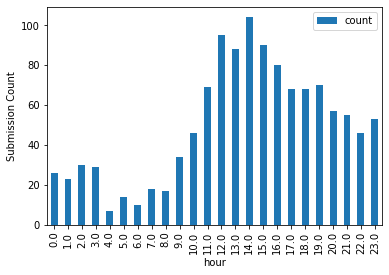

In [35]:
submissions_per_hour.plot(x='hour' , y='count' , kind='bar')
plt.ylabel('Submission Count')

### Count of log events
Count of log events per user for the following verbs: ['loggedin', 'viewed',
'started', ,'submitted', 'uploaded', 'updated', 'searched', 'resumed', 'answered',
'attempted', 'abandoned']

In [36]:
moodle.get_num_events_by_user()

,userid,viewed,uploaded,updated,answered,abandoned,submitted,searched,attempted
0,-10,0,0,0,0,0,0,0,0
1,-1,0,0,0,0,0,0,0,0
2,0,5305,0,649,0,0,0,0,0
3,1,2,0,0,0,0,0,0,0
4,2,2492,21,2551,0,5,21,0,0
...,...,...,...,...,...,...,...,...,...
1044,1048,11,0,1,0,0,0,0,0
1045,1049,9,0,0,0,0,0,0,0
1046,1050,9,0,0,0,0,0,0,0
1047,1051,9,0,0,0,0,0,0,0


### Overall grade of learners

In [37]:
moodle.get_overall_grades()

,userid,sum
0,2,NaN
1,3,200.00000
2,5,400.66666
3,7,200.00000
4,9,636.00000
...,...,...
402,991,200.00000
403,1019,200.00000
404,1025,2700.00000
405,1027,3124.00000


### Number of forum posts

In [38]:
moodle.get_num_forum_posts().values[0][0]

131

## Task 2

### Number of Logins per user

In [14]:
user_login_counts = moodle.get_login_counts()
user_login_counts

,userid,logged_in
0,-10,0
1,-1,0
2,0,0
3,1,1
4,2,169
...,...,...
1044,1048,1
1045,1049,0
1046,1050,0
1047,1051,0


In [12]:
user_login_counts_length = len(user_login_counts)

In [10]:
def rows_to_get(df_length , percentage_to_return):
    return int(df_length*percentage_to_return)

### Group users into top 1%

#### Based on Login Count

In [15]:
user_login_counts.nlargest(rows_to_get(user_login_counts_length , 0.01), 'logged_in')


,userid,logged_in
4,2,169
242,246,113
5,3,107
365,369,100
161,165,91
286,290,73
340,344,68
262,266,64
41,45,63
86,90,57


#### Based on Acitivity Count

#### Based on Dedication Time

### Group users into top 5%

#### Based on Login Count

In [16]:
user_login_counts.nlargest(rows_to_get(user_login_counts_length , 0.05), 'logged_in')


,userid,logged_in
4,2,169
242,246,113
5,3,107
365,369,100
161,165,91
286,290,73
340,344,68
262,266,64
41,45,63
86,90,57


#### Based on Activity Count

#### Based on Dedication Time

### Group users into top 10%

#### Based on Login Count

In [17]:
user_login_counts.nlargest(rows_to_get(user_login_counts_length , 0.1), 'logged_in')


,userid,logged_in
4,2,169
242,246,113
5,3,107
365,369,100
161,165,91
...,...,...
134,138,12
342,346,12
195,199,11
213,217,11


#### Based on Acitivity Count

#### Based on  Dedication Time

### Group users into top 25%

#### Based on Login Count

In [18]:
user_login_counts.nlargest(rows_to_get(user_login_counts_length , 0.25), 'logged_in')


,userid,logged_in
4,2,169
242,246,113
5,3,107
365,369,100
161,165,91
...,...,...
190,194,3
198,202,3
210,214,3
211,215,3


#### Based on Acitivity Count

#### Based on Dedication Time